# Speed Scraping

In [19]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import numpy as np

In [9]:
top_speeds = {}
for i in range(1,158):
    url = 'https://speedsdb.com/soccer-players?page={}'.format(i)
    r = requests.get(url)
    items = r.text.split('<div class="soccer-player">')[1:]
    for item in items:
        # strip name
        name = item.split("<h3>")[1]
        name = name.split("</h3>")[0]
        
        # get speed
        speed = item.split("<h4>")[1]
        speed = speed.split(" km/h")[0]
        top_speeds[name] = float(speed)


In [10]:
top_speeds

{'Sven Botman': 39.21,
 'Darwin Núñez': 38.0,
 'Kylian Mbappé': 37.9,
 'Gareth Bale': 36.9,
 'Mykhailo Mudryk': 36.63,
 'Ousmane Dembélé': 36.6,
 'Adama Traoré': 29.8,
 'Rafael Leão': 36.5,
 'Federico Valverde': 36.3,
 'Alphonso Davies': 36.21,
 'Nuno Tavares': 36.21,
 'Alejandro Garnacho': 36.2,
 'Karim Adeyemi': 36.1,
 'Moussa Diaby': 36.1,
 'Erling Haaland': 36.04,
 'Rafa Silva': 35.9,
 'Vinícius Júnior': 35.4,
 'Reinildo': 35.4,
 'Armando Broja': 35.3,
 'Tajon Buchanan': 35.1,
 'João Mário': 35.1,
 'Achraf Hakimi': 35.0,
 'Zaidu': 35.0,
 'Youssef En-Nesyri': 34.9,
 'Diogo Dalot': 34.9,
 'Callum Hudson-Odoi': 34.9,
 'José Ángel Carmona': 34.9,
 'Calvin Bassey': 34.9,
 'Victor Kristiansen': 34.71,
 'Marcos Llorente': 34.71,
 'Galeno': 34.71,
 'Jadon Sancho': 34.6,
 'Stanley Nsoki': 34.6,
 'Alfonso Pedraza': 34.6,
 'Randal Kolo Muani': 34.6,
 'Maxence Lacroix': 34.5,
 'Valentin Rosier': 34.5,
 'Antonio Rüdiger': 34.5,
 'Nahuel Molina': 34.5,
 'Leroy Sané': 34.4,
 'Nuno Mendes': 34.4,


In [35]:
# load data
league_data_dir = os.getcwd() + '/data/leaguedata'
all_data = []
for filename in os.listdir(league_data_dir):
    if not filename.startswith("20"):
        continue
    league = "Premier League" if "PremierLeague" in filename else "La Liga" if "LaLiga" in filename else "Bundesliga" if "Bundesliga" in filename else "SerieA" if "SerieA" in filename else "Ligue1"
    year = 2017 if "2017" in filename else 2018 if "2018" in filename else 2019 if "2019" in filename else "2020"
    with open(os.path.join(league_data_dir, filename)) as f:
        for line in f:
            data = json.loads(line)
            merged_dict = {
                'name': data['name'] if 'name' in data else None, 
                'age': data['age'] if 'age' in data else None, 
                'nationality': data['nationality'] if 'nationality' in data else None,
                'height': data['height'] if 'height' in data else None,
                'weight': data['weight'] if 'weight' in data else None,
                'team': data['team'] if 'team' in data else None,
                'position': data['position'] if 'position' in data else None,
                'league': league,
                'year': year
            }
            
            merged_dict.update(data['general_stats'] if 'general_stats' in data else {})
            merged_dict.update(data['offensive_stats'] if 'offensive_stats' in data else {})
            merged_dict.update(data['passing_stats'] if 'passing_stats' in data else {})
            merged_dict.update(data['defensive_stats'] if 'defensive_stats' in data else {})
            all_data.append(merged_dict)
player_data = pd.DataFrame(all_data)

# drop rows with NaN (375 out of 6267)
player_data = player_data.dropna()
all_data = player_data.copy()
player_data

,name,age,nationality,height,weight,team,position,league,year,games,...,PPA,CrsPA,Prog,Tkl,TklW,Past,Press,Succ,Blocks,Int
0,Lukasz Piszczek,32,Poland,184.0,79.0,Borussia Dortmund,DF,Bundesliga,2017,24.0,...,27,12,119,42,24,26,308,99,45,29
1,Sven Bender,28,Germany,186.0,80.0,Bayer Leverkusen,DF,Bundesliga,2017,29.0,...,3,0,89,43,30,18,263,102,64,27
2,Lars Bender,28,Germany,185.0,81.0,Bayer Leverkusen,DF,Bundesliga,2017,21.0,...,19,6,103,57,31,29,371,102,37,15
3,Aaron Hunt,31,Germany,183.0,73.0,Hamburger SV,MF,Bundesliga,2017,29.0,...,31,5,97,30,22,32,484,135,30,14
4,Marcel Heller,31,Germany,175.0,70.0,Augsburg,FW,Bundesliga,2017,24.0,...,15,9,23,33,24,25,291,62,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,Giovani Lo Celso,22,Argentina,177.0,68.0,Real Betis,MF,La Liga,2018,32.0,...,47,2,124,55,46,32,500,137,36,10
6262,Jony,27,Spain,179.0,76.0,Alaves,MF,La Liga,2018,36.0,...,60,35,85,27,12,39,491,98,42,24
6263,Marc Cucurella,20,Spain,172.0,66.0,Eibar,MF,La Liga,2018,31.0,...,29,14,68,44,39,16,689,223,45,15
6264,Stanislav Lobotka,24,Slovakia,170.0,68.0,Celta Vigo,MF,La Liga,2018,31.0,...,12,1,106,42,34,35,670,151,23,26


In [36]:
common_players = set(player_data.name).intersection(set(top_speeds.keys()))
"there are {} common players with speeds and data to analyse".format(len(common_players))

'there are 696 common players with speeds and data to analyse'

In [37]:
player_data['top speed'] = player_data['name'].map(top_speeds)
player_data = player_data.dropna()
player_data

,name,age,nationality,height,weight,team,position,league,year,games,...,CrsPA,Prog,Tkl,TklW,Past,Press,Succ,Blocks,Int,top speed
1,Sven Bender,28,Germany,186.0,80.0,Bayer Leverkusen,DF,Bundesliga,2017,29.0,...,0,89,43,30,18,263,102,64,27,29.00
2,Lars Bender,28,Germany,185.0,81.0,Bayer Leverkusen,DF,Bundesliga,2017,21.0,...,6,103,57,31,29,371,102,37,15,29.00
29,Niklas Moisander,32,Finland,183.0,75.0,Werder Bremen,DF,Bundesliga,2017,25.0,...,0,112,41,32,17,223,72,31,27,28.45
31,Oscar Wendt,32,Sweden,181.0,82.0,Borussia M.Gladbach,DF,Bundesliga,2017,28.0,...,9,86,41,21,17,373,100,64,19,29.50
36,Mitchell Weiser,23,Germany,177.0,71.0,Hertha Berlin,DF,Bundesliga,2017,24.0,...,14,111,40,26,24,444,128,35,30,29.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6257,Álvaro Morata,26,Spain,190.0,84.0,Atletico Madrid,FW,La Liga,2018,15.0,...,0,12,13,10,12,267,71,9,5,32.60
6258,Arthur,22,Brazil,171.0,73.0,Barcelona,MF,La Liga,2018,27.0,...,0,82,17,15,13,350,98,15,9,25.10
6260,Giovani Lo Celso,22,Argentina,177.0,68.0,Real Betis,MF,La Liga,2018,32.0,...,2,124,55,46,32,500,137,36,10,34.21
6263,Marc Cucurella,20,Spain,172.0,66.0,Eibar,MF,La Liga,2018,31.0,...,14,68,44,39,16,689,223,45,15,32.21


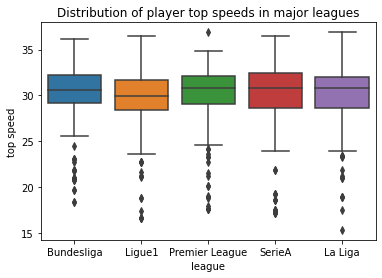

In [38]:
sns.boxplot(data = player_data, x = 'league', y='top speed')
plt.title('Distribution of player top speeds in major leagues');

In [39]:
country_data = {}
for country in player_data.nationality.unique():
    temp = player_data[player_data['nationality'] == country]
    average_speed = round(temp['top speed'].mean(),2)
    print("{} has average speed of: {} for {} players".format(country, average_speed, len(temp)))
    if len(temp) > 4:
        country_data[country] = average_speed

Germany has average speed of: 30.18 for 194 players
Finland has average speed of: 28.59 for 8 players
Sweden has average speed of: 29.66 for 23 players
France has average speed of: 30.34 for 258 players
Poland has average speed of: 32.03 for 9 players
Austria has average speed of: 31.15 for 26 players
Switzerland has average speed of: 28.05 for 47 players
Belgium has average speed of: 30.4 for 71 players
Brazil has average speed of: 30.51 for 150 players
Japan has average speed of: 31.86 for 11 players
Ukraine has average speed of: 30.62 for 3 players
Greece has average speed of: 28.2 for 8 players
Chile has average speed of: 27.62 for 12 players
Argentina has average speed of: 30.09 for 84 players
USA has average speed of: 30.91 for 14 players
Hungary has average speed of: 26.4 for 4 players
Spain has average speed of: 29.71 for 237 players
Colombia has average speed of: 28.64 for 27 players
Slovenia has average speed of: 27.36 for 10 players
Morocco has average speed of: 32.24 for 18

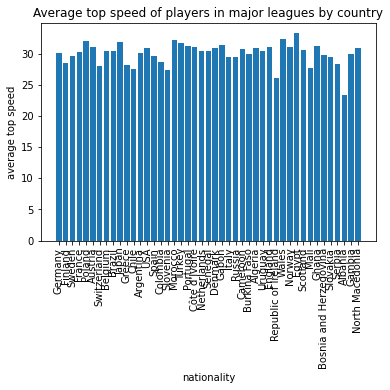

<Figure size 1008x720 with 0 Axes>

In [40]:
plt.bar(list(country_data.keys()), list(country_data.values()))
plt.xticks(rotation = 90);
plt.title("Average top speed of players in major leagues by country")
plt.ylabel("average top speed")
plt.xlabel("nationality")
plt.figure(figsize=(14, 10));

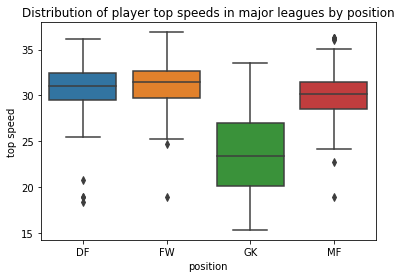

In [41]:
sns.boxplot(data = player_data, x = 'position', y='top speed')
plt.title('Distribution of player top speeds in major leagues by position');

# Clustering

First Lets Cluster just the height, weights and ages

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def cluster(a_data = all_data, attributes = ['age', 'weight', 'height']):
    X = a_data[attributes]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    interesting_results = []

    def prettyprint(var, data, n_clusters, top=10, a_data = a_data):
        for i in range(n_clusters):
            print("For cluster {}:".format(i))
            temp = data[data['cluster'] == i]
            d = dict(temp[var].value_counts())
            top_10 = sorted(d.items(), key = lambda x: x[1], reverse=True)[:top]
            for j, (key, value) in enumerate(top_10):
                initial_value_count = len(a_data[data[var] == key])
                if value/initial_value_count > 0.6 and initial_value_count > 20 and n_clusters != 2:
                    interesting_results.append("{} clusters: cluster #{}, attribute {}, value {}, count {}/{}".format(n_clusters, i, var, key, value, initial_value_count))
                print("{}: {}/{}".format(key, value, initial_value_count))
            print("\n")
        print("\n")
    
    # find optimal clusters for patterns
    for n_clusters in range(2, 10):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(X_scaled)
        cluster_labels = kmeans.labels_
        clustered_data = a_data.copy()
        clustered_data['cluster'] = cluster_labels
        print("For {} clusters\n".format(n_clusters))
        print("Top nationality counts")
        prettyprint('nationality', clustered_data, n_clusters)
        print("Top league counts")
        prettyprint('league', clustered_data, n_clusters)
        print("Top position counts")
        prettyprint('position', clustered_data, n_clusters)
        print("\n---------------------------------\n")
    print("\nInteresting Results:")
    for item in interesting_results:
        print(item)
    
cluster()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters

Top nationality counts
For cluster 0:
Spain: 540/818
France: 429/772
England: 261/444
Italy: 251/553
Germany: 201/557
Brazil: 127/225
Argentina: 96/205
Côte d'Ivoire: 58/83
Belgium: 52/124
Netherlands: 51/122


For cluster 1:
Germany: 356/557
France: 343/772
Italy: 302/553
Spain: 278/818
England: 183/444
Argentina: 109/205
Brazil: 98/225
Serbia: 81/98
Belgium: 72/124
Netherlands: 71/122




Top league counts
For cluster 0:
La Liga: 678/1150
Ligue1: 656/1138
Premier League: 605/1219
SerieA: 563/1275
Bundesliga: 442/1110


For cluster 1:
SerieA: 712/1275
Bundesliga: 668/1110
Premier League: 614/1219
Ligue1: 482/1138
La Liga: 472/1150




Top position counts
For cluster 0:
MF: 1242/1945
DF: 870/2081
FW: 808/1474
GK: 23/388
FW,MF: 1/2


For cluster 1:
DF: 1211/2081
MF: 703/1945
FW: 666/1474
GK: 365/388
DF,MF: 1/1
MF,FW: 1/1
FW,MF: 1/2





---------------------------------

For 3 clusters

Top nationality counts
For cluster 0:
Spain: 387/818
France: 348/772
England: 196/444

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 4 clusters

Top nationality counts
For cluster 0:
Spain: 269/818
France: 206/772
England: 130/444
Italy: 105/553
Brazil: 81/225
Germany: 65/557
Argentina: 47/205
Belgium: 36/124
Algeria: 27/63
Côte d'Ivoire: 26/83


For cluster 1:
Germany: 190/557
France: 111/772
Spain: 96/818
Italy: 89/553
England: 82/444
Argentina: 52/205
Serbia: 43/98
Belgium: 34/124
Netherlands: 33/122
Brazil: 33/225


For cluster 2:
Spain: 262/818
France: 193/772
Italy: 177/553
Germany: 126/557
England: 104/444
Argentina: 61/205
Brazil: 50/225
Switzerland: 30/86
Croatia: 23/74
Colombia: 22/48


For cluster 3:
France: 262/772
Spain: 191/818
Italy: 182/553
Germany: 176/557
England: 128/444
Brazil: 61/225
Argentina: 45/205
Netherlands: 44/122
Belgium: 43/124
Poland: 31/67




Top league counts
For cluster 0:
La Liga: 363/1150
Premier League: 346/1219
Ligue1: 332/1138
SerieA: 216/1275
Bundesliga: 197/1110


For cluster 1:
Bundesliga: 326/1110
Premier League: 300/1219
SerieA: 234/1275
Ligue1: 167/1138
La Liga: 153/

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Brazil: 66/225
Germany: 45/557
Argentina: 36/205
Portugal: 24/76
Côte d'Ivoire: 21/83
Belgium: 20/124


For cluster 3:
Germany: 151/557
France: 80/772
Spain: 63/818
Italy: 57/553
England: 49/444
Belgium: 34/124
Serbia: 33/98
Argentina: 31/205
Austria: 23/85
Switzerland: 22/86


For cluster 4:
France: 144/772
Italy: 142/553
Spain: 131/818
Germany: 113/557
England: 70/444
Argentina: 50/205
Brazil: 37/225
Netherlands: 28/122
Switzerland: 23/86
Croatia: 22/74




Top league counts
For cluster 0:
SerieA: 439/1275
Ligue1: 341/1138
Bundesliga: 339/1110
La Liga: 291/1150
Premier League: 286/1219


For cluster 1:
La Liga: 285/1150
Premier League: 241/1219
SerieA: 207/1275
Ligue1: 186/1138
Bundesliga: 147/1110


For cluster 2:
Ligue1: 295/1138
La Liga: 265/1150
Premier League: 253/1219
SerieA: 171/1275
Bundesliga: 150/1110


For cluster 3:
Bundesliga: 268/1110
Premier League: 193/1219
SerieA: 157/1275
Ligue1: 116/1138
La Liga: 105/1150


For cluster 4:
SerieA: 301/1275
Premier League: 246/1219
B

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 clusters

Top nationality counts
For cluster 0:
France: 193/772
Italy: 155/553
Spain: 153/818
Germany: 147/557
England: 110/444
Brazil: 55/225
Netherlands: 38/122
Belgium: 37/124
Argentina: 33/205
Serbia: 31/98


For cluster 1:
Spain: 183/818
France: 168/772
England: 100/444
Italy: 73/553
Brazil: 57/225
Germany: 50/557
Argentina: 35/205
Algeria: 20/63
Netherlands: 20/122
Côte d'Ivoire: 19/83


For cluster 2:
Spain: 115/818
France: 79/772
England: 47/444
Italy: 46/553
Brazil: 31/225
Argentina: 22/205
Germany: 22/557
Belgium: 15/124
Chile: 13/28
Portugal: 12/76


For cluster 3:
Germany: 131/557
France: 71/772
Spain: 57/818
Italy: 51/553
England: 42/444
Belgium: 31/124
Serbia: 26/98
Argentina: 26/205
Netherlands: 21/122
Denmark: 20/64


For cluster 4:
Spain: 212/818
France: 140/772
Italy: 123/553
Germany: 114/557
England: 82/444
Argentina: 50/205
Brazil: 33/225
Switzerland: 25/86
Colombia: 20/48
Sweden: 15/60


For cluster 5:
France: 121/772
Italy: 105/553
Spain: 98/818
Germany: 93/

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Spain: 162/818
France: 149/772
England: 90/444
Italy: 65/553
Brazil: 51/225
Germany: 37/557
Argentina: 30/205
Algeria: 18/63
Côte d'Ivoire: 18/83
Uruguay: 17/68


For cluster 1:
Spain: 167/818
France: 150/772
Germany: 133/557
Italy: 102/553
England: 75/444
Argentina: 55/205
Brazil: 35/225
Netherlands: 25/122
Switzerland: 23/86
Croatia: 21/74


For cluster 2:
Germany: 117/557
France: 68/772
Spain: 51/818
Italy: 45/553
England: 38/444
Belgium: 25/124
Serbia: 24/98
Argentina: 23/205
Denmark: 19/64
Netherlands: 18/122


For cluster 3:
France: 151/772
Italy: 118/553
Spain: 112/818
Germany: 107/557
England: 90/444
Brazil: 42/225
Belgium: 31/124
Netherlands: 27/122
Serbia: 23/98
Poland: 22/67


For cluster 4:
Spain: 124/818
Italy: 100/553
France: 79/772
Germany: 43/557
England: 41/444
Brazil: 30/225
Argentina: 28/205
Switzerland: 16/86
Colombia: 11/48
Scotland: 9/47


For cluster 5:
Germany: 95/557
France: 94/772
Italy: 80/553
Spain: 80/818
England: 57/444
Argentina: 35/205
Serbia: 27/98
Neth

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 clusters

Top nationality counts
For cluster 0:
Spain: 176/818
France: 124/772
Germany: 82/557
Italy: 73/553
England: 61/444
Brazil: 29/225
Argentina: 26/205
Netherlands: 22/122
Côte d'Ivoire: 19/83
Austria: 16/85


For cluster 1:
Germany: 108/557
Spain: 100/818
France: 97/772
Italy: 87/553
England: 68/444
Argentina: 39/205
Brazil: 31/225
Netherlands: 30/122
Switzerland: 28/86
Serbia: 22/98


For cluster 2:
France: 130/772
Spain: 111/818
England: 78/444
Italy: 53/553
Brazil: 44/225
Germany: 28/557
Argentina: 26/205
Uruguay: 15/68
Algeria: 14/63
Mali: 14/42


For cluster 3:
France: 147/772
Spain: 117/818
Italy: 103/553
Germany: 99/557
England: 82/444
Brazil: 38/225
Belgium: 29/124
Netherlands: 23/122
Côte d'Ivoire: 21/83
Serbia: 20/98


For cluster 4:
Spain: 121/818
Italy: 92/553
France: 71/772
Germany: 39/557
England: 37/444
Brazil: 31/225
Argentina: 30/205
Switzerland: 15/86
Colombia: 9/48
Scotland: 9/47


For cluster 5:
France: 72/772
Germany: 67/557
Italy: 65/553
Spain: 50/818

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 clusters

Top nationality counts
For cluster 0:
Germany: 113/557
Spain: 110/818
France: 96/772
Italy: 87/553
England: 67/444
Argentina: 40/205
Brazil: 37/225
Netherlands: 28/122
Switzerland: 24/86
Serbia: 20/98


For cluster 1:
Germany: 112/557
France: 58/772
Spain: 44/818
Italy: 41/553
England: 36/444
Belgium: 23/124
Serbia: 21/98
Argentina: 21/205
Denmark: 18/64
Netherlands: 16/122


For cluster 2:
Spain: 117/818
Italy: 95/553
France: 74/772
Germany: 38/557
England: 32/444
Argentina: 28/205
Brazil: 23/225
Switzerland: 13/86
Uruguay: 10/68
Colombia: 8/48


For cluster 3:
Spain: 162/818
France: 115/772
Germany: 68/557
England: 63/444
Italy: 63/553
Brazil: 24/225
Argentina: 22/205
Netherlands: 16/122
Côte d'Ivoire: 16/83
Algeria: 16/63


For cluster 4:
France: 123/772
Spain: 105/818
England: 72/444
Italy: 52/553
Germany: 48/557
Argentina: 28/205
Brazil: 27/225
Austria: 15/85
Netherlands: 15/122
Morocco: 12/57


For cluster 5:
France: 112/772
Italy: 88/553
Germany: 83/557
Spain: 82

Now lets cluster the height, weights, ages and top speeds

In [88]:
cluster(player_data, ['age', 'weight', 'height', 'top speed'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters

Top nationality counts
For cluster 0:
Germany: 120/194
France: 99/258
Italy: 78/146
Spain: 75/237
Brazil: 52/150
Belgium: 39/71
Argentina: 39/84
Netherlands: 34/61
Switzerland: 32/47
England: 30/116


For cluster 1:
Spain: 162/237
France: 159/258
Brazil: 98/150
England: 86/116
Germany: 74/194
Italy: 68/146
Argentina: 45/84
Belgium: 32/71
Netherlands: 27/61
Portugal: 22/38




Top league counts
For cluster 0:
Bundesliga: 249/424
SerieA: 200/415
Premier League: 162/391
La Liga: 127/359
Ligue1: 108/314


For cluster 1:
La Liga: 232/359
Premier League: 229/391
SerieA: 215/415
Ligue1: 206/314
Bundesliga: 175/424




Top position counts
For cluster 0:
DF: 335/650
MF: 199/610
FW: 184/510
GK: 128/133


For cluster 1:
MF: 411/610
FW: 326/510
DF: 315/650
GK: 5/133





---------------------------------

For 3 clusters

Top nationality counts
For cluster 0:
Germany: 97/194
France: 93/258
Spain: 57/237
England: 54/116
Italy: 46/146
Brazil: 39/150
Belgium: 31/71
Denmark: 29/41
Nethe

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Premier League: 25/391
La Liga: 25/359
SerieA: 21/415
Ligue1: 19/314
Bundesliga: 18/424




Top position counts
For cluster 0:
MF: 252/610
DF: 169/650
FW: 160/510
GK: 6/133


For cluster 1:
DF: 212/650
MF: 204/610
FW: 190/510


For cluster 2:
DF: 258/650
FW: 159/510
MF: 148/610
GK: 37/133


For cluster 3:
GK: 90/133
DF: 11/650
MF: 6/610
FW: 1/510





---------------------------------

For 5 clusters

Top nationality counts
For cluster 0:
Germany: 53/194
France: 39/258
Spain: 33/237
Argentina: 22/84
Italy: 21/146
Brazil: 21/150
England: 17/116
Switzerland: 17/47
Netherlands: 15/61
Belgium: 14/71


For cluster 1:
Spain: 73/237
France: 71/258
Brazil: 57/150
Italy: 42/146
England: 32/116
Germany: 22/194
Belgium: 17/71
Portugal: 16/38
Argentina: 14/84
Netherlands: 13/61


For cluster 2:
France: 83/258
Germany: 70/194
England: 47/116
Spain: 46/237
Italy: 43/146
Brazil: 27/150
Belgium: 23/71
Netherlands: 20/61
Argentina: 19/84
Portugal: 14/38


For cluster 3:
Spain: 21/237
Italy: 14/146
Fran

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


La Liga: 25/359
Premier League: 24/391
SerieA: 21/415
Ligue1: 19/314
Bundesliga: 18/424


For cluster 4:
SerieA: 113/415
La Liga: 98/359
Premier League: 80/391
Ligue1: 75/314
Bundesliga: 73/424




Top position counts
For cluster 0:
DF: 164/650
FW: 92/510
MF: 72/610
GK: 26/133


For cluster 1:
MF: 188/610
FW: 153/510
DF: 117/650
GK: 1/133


For cluster 2:
DF: 211/650
MF: 178/610
FW: 155/510


For cluster 3:
GK: 90/133
DF: 10/650
MF: 6/610
FW: 1/510


For cluster 4:
MF: 166/610
DF: 148/650
FW: 109/510
GK: 16/133





---------------------------------

For 6 clusters

Top nationality counts
For cluster 0:
France: 61/258
Italy: 41/146
Spain: 41/237
Brazil: 37/150
England: 32/116
Portugal: 11/38
Argentina: 9/84
Germany: 9/194
North Macedonia: 6/6
Netherlands: 5/61


For cluster 1:
Germany: 46/194
France: 35/258
England: 18/116
Switzerland: 17/47
Denmark: 16/41
Spain: 16/237
Belgium: 11/71
Brazil: 10/150
Netherlands: 10/61
Argentina: 10/84


For cluster 2:
Spain: 21/237
France: 13/258
Germa

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Spain: 74/237
France: 49/258
Brazil: 44/150
England: 28/116
Germany: 21/194
Argentina: 18/84
Belgium: 17/71
Italy: 16/146
Colombia: 13/27
Chile: 11/12


For cluster 5:
France: 70/258
Germany: 64/194
Spain: 52/237
Italy: 39/146
England: 35/116
Brazil: 29/150
Argentina: 24/84
Netherlands: 23/61
Belgium: 23/71
Austria: 13/26




Top league counts
For cluster 0:
Ligue1: 84/314
Premier League: 68/391
La Liga: 66/359
SerieA: 62/415
Bundesliga: 40/424


For cluster 1:
Bundesliga: 100/424
Premier League: 61/391
SerieA: 42/415
Ligue1: 31/314
La Liga: 20/359


For cluster 2:
La Liga: 25/359
Premier League: 23/391
SerieA: 19/415
Ligue1: 19/314
Bundesliga: 18/424


For cluster 3:
SerieA: 87/415
Bundesliga: 84/424
La Liga: 59/359
Premier League: 47/391
Ligue1: 36/314


For cluster 4:
Premier League: 98/391
La Liga: 93/359
SerieA: 81/415
Ligue1: 62/314
Bundesliga: 58/424


For cluster 5:
SerieA: 124/415
Bundesliga: 124/424
La Liga: 96/359
Premier League: 94/391
Ligue1: 82/314




Top position counts

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 clusters

Top nationality counts
For cluster 0:
Germany: 51/194
Spain: 48/237
France: 45/258
Italy: 30/146
Brazil: 25/150
Argentina: 23/84
England: 22/116
Netherlands: 19/61
Belgium: 18/71
Austria: 11/26


For cluster 1:
Spain: 49/237
France: 41/258
Brazil: 33/150
Italy: 27/146
Portugal: 13/38
Belgium: 12/71
England: 11/116
Germany: 11/194
Senegal: 10/27
Chile: 7/12


For cluster 2:
France: 51/258
England: 39/116
Spain: 28/237
Brazil: 26/150
Italy: 26/146
Germany: 18/194
Netherlands: 13/61
Morocco: 10/18
Argentina: 10/84
Portugal: 8/38


For cluster 3:
Germany: 49/194
France: 46/258
England: 20/116
Denmark: 18/41
Switzerland: 17/47
Spain: 16/237
Brazil: 14/150
Italy: 14/146
Belgium: 13/71
Argentina: 11/84


For cluster 4:
Spain: 21/237
Italy: 14/146
France: 13/258
Germany: 12/194
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 5:
Spain: 51/237
France: 35/258
Brazil: 31/150
England: 21/116
Germany: 21/194
Argentina: 17/84
Ita

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Italy: 10/146
Netherlands: 8/61
Argentina: 8/84


For cluster 3:
Spain: 50/237
Brazil: 37/150
France: 30/258
Germany: 23/194
Italy: 19/146
England: 15/116
Argentina: 12/84
Denmark: 11/41
Japan: 8/11
Colombia: 8/27


For cluster 4:
France: 36/258
Spain: 33/237
Germany: 31/194
Brazil: 24/150
Italy: 22/146
Argentina: 19/84
Netherlands: 9/61
England: 9/116
Colombia: 8/27
Mali: 5/7


For cluster 5:
France: 53/258
England: 28/116
Italy: 27/146
Spain: 27/237
Brazil: 25/150
Argentina: 8/84
Germany: 7/194
Netherlands: 7/61
Portugal: 5/38
Austria: 5/26


For cluster 6:
Germany: 45/194
France: 45/258
England: 30/116
Spain: 24/237
Belgium: 21/71
Italy: 21/146
Brazil: 17/150
Netherlands: 17/61
Portugal: 14/38
Uruguay: 11/33


For cluster 7:
Spain: 21/237
Germany: 12/194
France: 11/258
Italy: 10/146
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7




Top league counts
For cluster 0:
Bundesliga: 69/424
SerieA: 60/415
La Liga: 49/359
Premier League: 42/391
Lig

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 clusters

Top nationality counts
For cluster 0:
Spain: 26/237
France: 25/258
Germany: 22/194
Italy: 20/146
Brazil: 19/150
Argentina: 9/84
Uruguay: 7/33
Serbia: 5/6
Belgium: 5/71
Sweden: 5/23


For cluster 1:
Spain: 59/237
France: 38/258
Brazil: 31/150
Germany: 24/194
England: 17/116
Argentina: 15/84
Denmark: 12/41
Belgium: 11/71
Colombia: 11/27
Italy: 9/146


For cluster 2:
Spain: 16/237
Germany: 12/194
France: 11/258
Italy: 10/146
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 3:
Germany: 37/194
France: 22/258
England: 16/116
Spain: 15/237
Switzerland: 12/47
Italy: 9/146
Netherlands: 9/61
Belgium: 9/71
Denmark: 8/41
Uruguay: 4/33


For cluster 4:
Spain: 33/237
France: 24/258
Brazil: 23/150
Italy: 21/146
England: 12/116
Argentina: 9/84
Belgium: 8/71
Portugal: 8/38
Chile: 7/12
Switzerland: 6/47


For cluster 5:
Germany: 19/194
Argentina: 19/84
Italy: 17/146
Brazil: 16/150
Netherlands: 14/61
France: 13/258
Spain: 12/237
Switz

In [89]:
cluster(player_data, ['weight', 'height', 'top speed'])

For 2 clusters

Top nationality counts
For cluster 0:
Spain: 167/237
France: 155/258
Brazil: 97/150
England: 85/116
Italy: 71/146
Germany: 68/194
Argentina: 48/84
Belgium: 32/71
Netherlands: 27/61
Portugal: 22/38


For cluster 1:
Germany: 126/194
France: 103/258
Italy: 75/146
Spain: 70/237
Brazil: 53/150
Belgium: 39/71
Argentina: 36/84
Netherlands: 34/61
Switzerland: 32/47
England: 31/116




Top league counts
For cluster 0:
La Liga: 232/359
Premier League: 229/391
SerieA: 215/415
Ligue1: 205/314
Bundesliga: 174/424


For cluster 1:
Bundesliga: 250/424
SerieA: 200/415
Premier League: 162/391
La Liga: 127/359
Ligue1: 109/314




Top position counts
For cluster 0:
MF: 410/610
DF: 324/650
FW: 316/510
GK: 5/133


For cluster 1:
DF: 326/650
MF: 200/610
FW: 194/510
GK: 128/133





---------------------------------



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 3 clusters

Top nationality counts
For cluster 0:
France: 148/258
Spain: 140/237
Brazil: 88/150
England: 71/116
Germany: 60/194
Italy: 59/146
Argentina: 37/84
Belgium: 24/71
Netherlands: 23/61
Portugal: 20/38


For cluster 1:
Spain: 22/237
Italy: 15/146
France: 14/258
Germany: 12/194
Switzerland: 10/47
Colombia: 7/27
Belgium: 5/71
Slovenia: 4/10
Hungary: 4/4
Senegal: 4/27


For cluster 2:
Germany: 122/194
France: 96/258
Spain: 75/237
Italy: 72/146
Brazil: 60/150
Argentina: 46/84
Belgium: 42/71
England: 42/116
Netherlands: 37/61
Denmark: 29/41




Top league counts
For cluster 0:
Premier League: 205/391
Ligue1: 194/314
La Liga: 191/359
SerieA: 171/415
Bundesliga: 150/424


For cluster 1:
La Liga: 26/359
Premier League: 25/391
SerieA: 22/415
Bundesliga: 22/424
Ligue1: 20/314


For cluster 2:
Bundesliga: 252/424
SerieA: 222/415
Premier League: 161/391
La Liga: 142/359
Ligue1: 100/314




Top position counts
For cluster 0:
MF: 364/610
FW: 281/510
DF: 263/650
GK: 3/133


For cluster 1:


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 5 clusters

Top nationality counts
For cluster 0:
France: 88/258
Spain: 84/237
Brazil: 65/150
England: 48/116
Italy: 46/146
Germany: 26/194
Argentina: 18/84
Belgium: 16/71
Portugal: 16/38
Senegal: 11/27


For cluster 1:
Spain: 54/237
France: 50/258
Germany: 49/194
Italy: 33/146
Argentina: 28/84
Brazil: 25/150
Netherlands: 18/61
Uruguay: 11/33
England: 10/116
Finland: 7/8


For cluster 2:
France: 58/258
Spain: 48/237
Germany: 46/194
England: 37/116
Brazil: 34/150
Italy: 34/146
Belgium: 27/71
Netherlands: 20/61
Argentina: 16/84
Denmark: 14/41


For cluster 3:
Germany: 61/194
France: 51/258
Spain: 30/237
Brazil: 24/150
Argentina: 21/84
Switzerland: 19/47
Italy: 19/146
England: 18/116
Denmark: 17/41
Belgium: 16/71


For cluster 4:
Spain: 21/237
Italy: 14/146
Germany: 12/194
France: 11/258
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7




Top league counts
For cluster 0:
Premier League: 129/391
La Liga: 120/359
Ligue1: 113/314
SerieA: 101/415


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Italy: 14/146
Germany: 12/194
France: 11/258
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 4:
France: 44/258
Germany: 43/194
Brazil: 39/150
Spain: 26/237
Italy: 23/146
England: 23/116
Belgium: 21/71
Denmark: 19/41
Netherlands: 16/61
Portugal: 14/38


For cluster 5:
Germany: 40/194
Spain: 29/237
France: 27/258
Argentina: 21/84
Switzerland: 19/47
Italy: 19/146
Belgium: 14/71
England: 14/116
Netherlands: 10/61
Brazil: 10/150




Top league counts
For cluster 0:
Premier League: 116/391
Bundesliga: 103/424
Ligue1: 95/314
La Liga: 90/359
SerieA: 85/415


For cluster 1:
SerieA: 90/415
Ligue1: 84/314
Bundesliga: 74/424
La Liga: 70/359
Premier League: 61/391


For cluster 2:
La Liga: 71/359
Premier League: 62/391
Ligue1: 59/314
SerieA: 53/415
Bundesliga: 32/424


For cluster 3:
La Liga: 25/359
Premier League: 21/391
SerieA: 21/415
Bundesliga: 18/424
Ligue1: 17/314


For cluster 4:
SerieA: 103/415
Bundesliga: 96/424
La Liga: 77/359
Premi

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 clusters

Top nationality counts
For cluster 0:
Italy: 33/146
Germany: 23/194
France: 20/258
Spain: 17/237
Argentina: 17/84
Netherlands: 16/61
Brazil: 13/150
Belgium: 11/71
Switzerland: 9/47
Uruguay: 8/33


For cluster 1:
France: 59/258
Italy: 36/146
Brazil: 35/150
Spain: 34/237
England: 33/116
Argentina: 17/84
Germany: 16/194
Senegal: 10/27
Belgium: 10/71
Netherlands: 10/61


For cluster 2:
France: 31/258
Spain: 30/237
Brazil: 27/150
England: 16/116
Italy: 16/146
Portugal: 15/38
Belgium: 8/71
Chile: 7/12
Germany: 6/194
Uruguay: 4/33


For cluster 3:
Spain: 18/237
Italy: 14/146
Germany: 12/194
France: 11/258
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 4:
France: 50/258
Germany: 41/194
Spain: 36/237
Brazil: 35/150
Italy: 24/146
England: 22/116
Belgium: 21/71
Denmark: 20/41
Portugal: 18/38
Uruguay: 14/33


For cluster 5:
Spain: 73/237
France: 62/258
Germany: 49/194
Brazil: 32/150
England: 24/116
Argentina: 20/84
Italy: 10/

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Premier League: 63/391
Ligue1: 42/314


For cluster 5:
Ligue1: 79/314
La Liga: 65/359
Bundesliga: 63/424
Premier League: 57/391
SerieA: 51/415


For cluster 6:
Ligue1: 45/314
Premier League: 45/391
La Liga: 42/359
SerieA: 39/415
Bundesliga: 17/424


For cluster 7:
Bundesliga: 90/424
Premier League: 57/391
SerieA: 50/415
La Liga: 40/359
Ligue1: 26/314




Top position counts
For cluster 0:
DF: 105/650
FW: 58/510
MF: 14/610
GK: 4/133


For cluster 1:
FW: 113/510
DF: 90/650
MF: 82/610


For cluster 2:
DF: 98/650
MF: 69/610
FW: 43/510
GK: 33/133


For cluster 3:
GK: 90/133
DF: 4/650
MF: 1/610
FW: 1/510


For cluster 4:
DF: 138/650
MF: 101/610
FW: 91/510
GK: 2/133


For cluster 5:
MF: 164/610
DF: 76/650
FW: 71/510
GK: 4/133


For cluster 6:
MF: 95/610
FW: 53/510
DF: 40/650


For cluster 7:
DF: 99/650
MF: 84/610
FW: 80/510





---------------------------------

For 9 clusters

Top nationality counts
For cluster 0:
Spain: 44/237
France: 41/258
Brazil: 18/150
Argentina: 15/84
Germany: 14/194

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


England: 11/116
Belgium: 10/71
Netherlands: 8/61
Switzerland: 7/47
Denmark: 7/41


For cluster 3:
Spain: 21/237
Italy: 14/146
Germany: 12/194
France: 11/258
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 4:
France: 21/258
Brazil: 19/150
Spain: 15/237
Portugal: 14/38
Italy: 13/146
England: 12/116
Belgium: 8/71
Chile: 7/12
Germany: 6/194
North Macedonia: 4/6


For cluster 5:
Germany: 28/194
Italy: 26/146
France: 20/258
Argentina: 17/84
Netherlands: 16/61
Belgium: 11/71
Spain: 9/237
Switzerland: 9/47
Brazil: 9/150
Uruguay: 8/33


For cluster 6:
France: 40/258
Spain: 37/237
Italy: 24/146
England: 22/116
Argentina: 14/84
Brazil: 13/150
Morocco: 5/18
Belgium: 5/71
Scotland: 4/7
Algeria: 4/18


For cluster 7:
Germany: 38/194
France: 37/258
Brazil: 23/150
Spain: 18/237
Italy: 13/146
England: 13/116
Denmark: 12/41
Portugal: 11/38
USA: 10/14
Poland: 9/9


For cluster 8:
Brazil: 42/150
Spain: 38/237
France: 37/258
Germany: 33/194
England: 1

In [92]:
cluster(all_data, ['weight', 'height'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters

Top nationality counts
For cluster 0:
Germany: 371/557
France: 352/772
Italy: 305/553
Spain: 280/818
England: 201/444
Argentina: 103/205
Brazil: 101/225
Serbia: 81/98
Belgium: 78/124
Netherlands: 73/122


For cluster 1:
Spain: 538/818
France: 420/772
Italy: 248/553
England: 243/444
Germany: 186/557
Brazil: 124/225
Argentina: 102/205
Côte d'Ivoire: 53/83
Netherlands: 49/122
Belgium: 46/124




Top league counts
For cluster 0:
SerieA: 735/1275
Bundesliga: 686/1110
Premier League: 629/1219
Ligue1: 489/1138
La Liga: 475/1150


For cluster 1:
La Liga: 675/1150
Ligue1: 649/1138
Premier League: 590/1219
SerieA: 540/1275
Bundesliga: 424/1110




Top position counts
For cluster 0:
DF: 1195/2081
MF: 757/1945
FW: 691/1474
GK: 368/388
DF,MF: 1/1
MF,FW: 1/1
FW,MF: 1/2


For cluster 1:
MF: 1188/1945
DF: 886/2081
FW: 783/1474
GK: 20/388
FW,MF: 1/2





---------------------------------

For 3 clusters

Top nationality counts
For cluster 0:
Spain: 388/818
France: 350/772
Italy: 288/553

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 4 clusters

Top nationality counts
For cluster 0:
Germany: 179/557
France: 113/772
Italy: 92/553
Spain: 80/818
England: 70/444
Argentina: 46/205
Belgium: 37/124
Serbia: 36/98
Austria: 29/85
Netherlands: 27/122


For cluster 1:
Spain: 345/818
France: 257/772
Italy: 161/553
England: 153/444
Germany: 147/557
Argentina: 64/205
Brazil: 63/225
Côte d'Ivoire: 40/83
Netherlands: 34/122
Austria: 32/85


For cluster 2:
Spain: 180/818
France: 155/772
England: 90/444
Italy: 68/553
Brazil: 57/225
Argentina: 38/205
Germany: 33/557
Belgium: 25/124
Portugal: 25/76
Uruguay: 16/68


For cluster 3:
France: 247/772
Italy: 232/553
Spain: 213/818
Germany: 198/557
England: 131/444
Brazil: 78/225
Argentina: 57/205
Netherlands: 46/122
Serbia: 45/98
Belgium: 44/124




Top league counts
For cluster 0:
Bundesliga: 316/1110
Premier League: 249/1219
SerieA: 214/1275
Ligue1: 172/1138
La Liga: 122/1150


For cluster 1:
Ligue1: 402/1138
La Liga: 392/1150
Premier League: 368/1219
SerieA: 357/1275
Bundesliga: 301/1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Spain: 274/818
France: 237/772
England: 147/444
Italy: 123/553
Germany: 101/557
Brazil: 61/225
Argentina: 58/205
Côte d'Ivoire: 31/83
Netherlands: 29/122
Austria: 28/85


For cluster 4:
Germany: 157/557
France: 153/772
Italy: 149/553
Spain: 107/818
England: 86/444
Serbia: 43/98
Brazil: 41/225
Netherlands: 38/122
Belgium: 36/124
Austria: 36/85




Top league counts
For cluster 0:
La Liga: 220/1150
Ligue1: 173/1138
Premier League: 171/1219
SerieA: 101/1275
Bundesliga: 82/1110


For cluster 1:
Bundesliga: 173/1110
Premier League: 119/1219
SerieA: 106/1275
Ligue1: 105/1138
La Liga: 65/1150


For cluster 2:
SerieA: 463/1275
La Liga: 355/1150
Ligue1: 306/1138
Bundesliga: 289/1110
Premier League: 270/1219


For cluster 3:
Ligue1: 364/1138
Premier League: 342/1219
La Liga: 311/1150
SerieA: 286/1275
Bundesliga: 248/1110


For cluster 4:
SerieA: 319/1275
Bundesliga: 318/1110
Premier League: 317/1219
La Liga: 199/1150
Ligue1: 190/1138




Top position counts
For cluster 0:
MF: 356/1945
FW: 222/14

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 clusters

Top nationality counts
For cluster 0:
Spain: 112/818
France: 97/772
England: 54/444
Italy: 51/553
Brazil: 34/225
Argentina: 23/205
Germany: 21/557
Portugal: 18/76
Belgium: 16/124
Chile: 12/28


For cluster 1:
Germany: 159/557
France: 149/772
Italy: 133/553
Spain: 104/818
England: 75/444
Brazil: 39/225
Serbia: 37/98
Argentina: 37/205
Netherlands: 36/122
Austria: 36/85


For cluster 2:
France: 153/772
Spain: 145/818
Germany: 124/557
Italy: 91/553
England: 69/444
Argentina: 61/205
Brazil: 34/225
Switzerland: 24/86
Colombia: 19/48
Netherlands: 18/122


For cluster 3:
Germany: 96/557
France: 63/772
Spain: 39/818
Italy: 30/553
England: 30/444
Serbia: 24/98
Argentina: 23/205
Denmark: 22/64
Belgium: 19/124
Senegal: 17/76


For cluster 4:
Spain: 175/818
Italy: 147/553
France: 135/772
England: 96/444
Germany: 95/557
Brazil: 48/225
Côte d'Ivoire: 29/83
Belgium: 24/124
Netherlands: 24/122
Poland: 22/67


For cluster 5:
Spain: 243/818
France: 175/772
England: 120/444
Italy: 101/553


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 clusters

Top nationality counts
For cluster 0:
France: 133/772
Italy: 109/553
Germany: 109/557
Spain: 84/818
England: 48/444
Brazil: 36/225
Argentina: 35/205
Serbia: 26/98
Netherlands: 26/122
Switzerland: 26/86


For cluster 1:
Spain: 234/818
France: 154/772
England: 115/444
Italy: 81/553
Germany: 62/557
Brazil: 61/225
Argentina: 35/205
Belgium: 26/124
Côte d'Ivoire: 23/83
Netherlands: 22/122


For cluster 2:
Spain: 175/818
France: 146/772
Germany: 112/557
Italy: 98/553
England: 62/444
Argentina: 62/205
Brazil: 28/225
Austria: 21/85
Switzerland: 19/86
Netherlands: 17/122


For cluster 3:
Germany: 70/557
France: 53/772
Italy: 25/553
England: 21/444
Denmark: 16/64
Argentina: 16/205
Serbia: 15/98
Spain: 15/818
Belgium: 15/124
Senegal: 11/76


For cluster 4:
Spain: 96/818
France: 90/772
England: 51/444
Italy: 48/553
Brazil: 30/225
Argentina: 19/205
Portugal: 17/76
Belgium: 12/124
Chile: 12/28
Germany: 12/557


For cluster 5:
Germany: 118/557
France: 79/772
Spain: 76/818
Italy: 74/55

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 clusters

Top nationality counts
For cluster 0:
Spain: 83/818
France: 59/772
Italy: 48/553
England: 39/444
Brazil: 22/225
Belgium: 15/124
Argentina: 13/205
Chile: 12/28
Portugal: 12/76
Germany: 10/557


For cluster 1:
Germany: 105/557
Italy: 93/553
France: 82/772
Spain: 70/818
England: 55/444
Serbia: 27/98
Argentina: 25/205
Austria: 24/85
Belgium: 24/124
Poland: 22/67


For cluster 2:
Spain: 180/818
France: 142/772
Germany: 105/557
Italy: 91/553
England: 67/444
Argentina: 58/205
Brazil: 28/225
Austria: 19/85
Switzerland: 19/86
Netherlands: 16/122


For cluster 3:
Germany: 92/557
France: 60/772
Spain: 36/818
Argentina: 30/205
Italy: 30/553
England: 30/444
Serbia: 22/98
Denmark: 19/64
Belgium: 17/124
Senegal: 15/76


For cluster 4:
Spain: 136/818
Italy: 126/553
France: 104/772
England: 78/444
Germany: 77/557
Brazil: 47/225
Côte d'Ivoire: 22/83
Netherlands: 20/122
Belgium: 20/124
Croatia: 19/74


For cluster 5:
Spain: 114/818
France: 106/772
England: 54/444
Brazil: 48/225
Germany: 3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 clusters

Top nationality counts
For cluster 0:
Spain: 148/818
Italy: 132/553
France: 105/772
Germany: 84/557
England: 73/444
Brazil: 44/225
Côte d'Ivoire: 22/83
Belgium: 20/124
Netherlands: 19/122
Croatia: 19/74


For cluster 1:
Spain: 114/818
France: 106/772
England: 49/444
Brazil: 48/225
Italy: 31/553
Germany: 31/557
Argentina: 23/205
Portugal: 16/76
Netherlands: 15/122
Belgium: 14/124


For cluster 2:
Italy: 68/553
France: 62/772
Germany: 56/557
Spain: 53/818
England: 51/444
Serbia: 22/98
Netherlands: 20/122
Belgium: 19/124
Poland: 17/67
Argentina: 17/205


For cluster 3:
Spain: 148/818
France: 115/772
Germany: 94/557
Italy: 68/553
England: 58/444
Argentina: 52/205
Brazil: 27/225
Netherlands: 16/122
Switzerland: 15/86
Austria: 15/85


For cluster 4:
Germany: 40/557
France: 21/772
Italy: 13/553
Denmark: 12/64
Senegal: 11/76
Serbia: 11/98
Argentina: 11/205
Belgium: 10/124
Spain: 10/818
England: 9/444


For cluster 5:
Spain: 83/818
France: 59/772
Italy: 48/553
England: 39/444
Br

In [91]:
cluster(player_data, ['height', 'top speed'])

For 2 clusters

Top nationality counts
For cluster 0:
Germany: 126/194
France: 111/258
Spain: 105/237
Italy: 82/146
Brazil: 56/150
Belgium: 50/71
England: 46/116
Argentina: 42/84
Netherlands: 38/61
Switzerland: 32/47


For cluster 1:
France: 147/258
Spain: 132/237
Brazil: 94/150
England: 70/116
Germany: 68/194
Italy: 64/146
Argentina: 42/84
Netherlands: 23/61
Portugal: 22/38

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Belgium: 21/71




Top league counts
For cluster 0:
Bundesliga: 243/424
SerieA: 235/415
Premier League: 186/391
La Liga: 161/359
Ligue1: 130/314


For cluster 1:
Premier League: 205/391
La Liga: 198/359
Ligue1: 184/314
Bundesliga: 181/424
SerieA: 180/415




Top position counts
For cluster 0:
DF: 371/650
MF: 253/610
FW: 203/510
GK: 128/133


For cluster 1:
MF: 357/610
FW: 307/510
DF: 279/650
GK: 5/133





---------------------------------

For 3 clusters

Top nationality counts
For cluster 0:
France: 139/258
Spain: 120/237
Brazil: 88/150
England: 66/116
Germany: 63/194
Italy: 54/146
Argentina: 42/84
Netherlands: 23/61
Belgium: 21/71
Austria: 20/26


For cluster 1:
Germany: 119/194
France: 104/258
Spain: 95/237
Italy: 73/146
Brazil: 60/150
England: 47/116
Belgium: 45/71
Argentina: 41/84
Netherlands: 37/61
Uruguay: 29/33


For cluster 2:
Spain: 22/237
Italy: 19/146
France: 15/258
Germany: 12/194
Switzerland: 10/47
Colombia: 7/27
Belgium: 5/71
Slovenia: 4/10
Hungary: 4/4
Senegal: 4/27



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 5 clusters

Top nationality counts
For cluster 0:
Spain: 64/237
France: 53/258
Brazil: 47/150
Germany: 23/194
England: 22/116
Italy: 16/146
Portugal: 14/38
Belgium: 11/71
Argentina: 11/84
Chile: 7/12


For cluster 1:
Germany: 73/194
France: 66/258
Spain: 45/237
Belgium: 38/71
Brazil: 37/150
Italy: 32/146
England: 31/116
Netherlands: 26/61
Denmark: 19/41
Portugal: 12/38


For cluster 2:
France: 54/258
Spain: 51/237
Argentina: 42/84
Italy: 41/146
Germany: 35/194
Brazil: 30/150
Switzerland: 15/47
Netherlands: 13/61
Uruguay: 11/33
England: 10/116


For cluster 3:
Spain: 21/237
Italy: 14/146
Germany: 12/194
France: 11/258
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 4:
France: 74/258
Spain: 56/237
Germany: 51/194
England: 50/116
Italy: 43/146
Brazil: 34/150
Argentina: 20/84
Netherlands: 14/61
Austria: 13/26
Denmark: 13/41




Top league counts
For cluster 0:
La Liga: 96/359
Ligue1: 71/314
Premier League: 67/391
Bundesliga: 57/42

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Italy: 14/146
France: 14/258
Germany: 12/194
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 3:
France: 75/258
Spain: 52/237
Brazil: 38/150
England: 37/116
Italy: 36/146
Argentina: 27/84
Germany: 18/194
Netherlands: 14/61
Austria: 11/26
Belgium: 10/71


For cluster 4:
Germany: 45/194
Italy: 31/146
Argentina: 24/84
France: 22/258
Spain: 20/237
Netherlands: 16/61
Switzerland: 16/47
Brazil: 15/150
England: 15/116
Belgium: 13/71


For cluster 5:
Spain: 35/237
Brazil: 30/150
France: 29/258
England: 19/116
Portugal: 14/38
Italy: 13/146
Germany: 13/194
Belgium: 11/71
Chile: 7/12
Netherlands: 6/61




Top league counts
For cluster 0:
SerieA: 106/415
Bundesliga: 98/424
Premier League: 92/391
La Liga: 73/359
Ligue1: 45/314


For cluster 1:
Bundesliga: 120/424
Ligue1: 94/314
SerieA: 88/415
La Liga: 84/359
Premier League: 83/391


For cluster 2:
La Liga: 26/359
SerieA: 21/415
Ligue1: 20/314
Premier League: 18/391
Bundesliga: 18/424


For clu

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 7 clusters

Top nationality counts
For cluster 0:
Spain: 26/237
Brazil: 25/150
France: 22/258
Belgium: 11/71
England: 10/116
Portugal: 9/38
Italy: 9/146
Germany: 7/194
North Macedonia: 4/6
Uruguay: 4/33


For cluster 1:
Germany: 40/194
Spain: 39/237
France: 37/258
Brazil: 30/150
Belgium: 27/71
Italy: 27/146
England: 26/116
Argentina: 17/84
Portugal: 17/38
Uruguay: 17/33


For cluster 2:
Spain: 21/237
Italy: 14/146
Germany: 12/194
France: 11/258
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 3:
Germany: 53/194
France: 38/258
Spain: 32/237
England: 21/116
Italy: 18/146
Brazil: 16/150
Belgium: 16/71
Netherlands: 14/61
Denmark: 13/41
USA: 6/14


For cluster 4:
France: 68/258
Spain: 48/237
Germany: 40/194
Brazil: 29/150
England: 28/116
Argentina: 16/84
Italy: 11/146
Sweden: 11/23
Denmark: 10/41
Austria: 9/26


For cluster 5:
France: 45/258
Spain: 40/237
Brazil: 32/150
Italy: 31/146
England: 23/116
Argentina: 13/84
Germany: 11/194


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bundesliga: 75/424
Premier League: 44/391
SerieA: 39/415
La Liga: 23/359
Ligue1: 18/314


For cluster 2:
Premier League: 44/391
Ligue1: 43/314
La Liga: 35/359
SerieA: 31/415
Bundesliga: 18/424


For cluster 3:
La Liga: 25/359
SerieA: 21/415
Premier League: 18/391
Bundesliga: 18/424
Ligue1: 17/314


For cluster 4:
SerieA: 91/415
Bundesliga: 90/424
Premier League: 67/391
La Liga: 55/359
Ligue1: 38/314


For cluster 5:
La Liga: 65/359
SerieA: 47/415
Premier League: 44/391
Bundesliga: 36/424
Ligue1: 34/314


For cluster 6:
Bundesliga: 107/424
Ligue1: 84/314
Premier League: 80/391
SerieA: 68/415
La Liga: 58/359


For cluster 7:
SerieA: 78/415
La Liga: 58/359
Ligue1: 51/314
Bundesliga: 50/424
Premier League: 47/391




Top position counts
For cluster 0:
DF: 83/650
FW: 66/510
MF: 35/610
GK: 2/133


For cluster 1:
DF: 110/650
FW: 44/510
MF: 34/610
GK: 11/133


For cluster 2:
MF: 90/610
FW: 50/510
DF: 31/650


For cluster 3:
GK: 90/133
MF: 4/610
DF: 4/650
FW: 1/510


For cluster 4:
DF: 134/650


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


France: 41/258
Spain: 40/237
Italy: 29/146
Brazil: 29/150
England: 21/116
Germany: 11/194
Argentina: 10/84
Netherlands: 8/61
Portugal: 6/38
Switzerland: 5/47


For cluster 2:
Spain: 14/237
Germany: 11/194
Italy: 10/146
France: 7/258
Belgium: 5/71
Slovenia: 4/10
Colombia: 4/27
Hungary: 4/4
Senegal: 4/27


For cluster 3:
Germany: 39/194
Spain: 29/237
France: 25/258
Italy: 17/146
England: 14/116
Belgium: 12/71
Netherlands: 10/61
Brazil: 8/150
Denmark: 7/41
Argentina: 6/84


For cluster 4:
France: 26/258
Spain: 26/237
Brazil: 25/150
England: 14/116
Belgium: 11/71
Portugal: 9/38
Italy: 9/146
Germany: 7/194
Uruguay: 4/33
Chile: 4/12


For cluster 5:
Germany: 53/194
France: 36/258
Brazil: 29/150
Spain: 27/237
Belgium: 26/71
England: 19/116
Italy: 18/146
Denmark: 12/41
Uruguay: 11/33
Netherlands: 11/61


For cluster 6:
France: 64/258
Spain: 48/237
Germany: 42/194
Brazil: 29/150
England: 20/116
Argentina: 16/84
Denmark: 13/41
Italy: 11/146
Sweden: 11/23
Austria: 9/26


For cluster 7:
England: 2

In [93]:
cluster(player_data, ['age', 'top speed', 'weight'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters

Top nationality counts
For cluster 0:
Spain: 97/237
France: 87/258
Germany: 85/194
Brazil: 66/150
Italy: 55/146
Argentina: 49/84
Belgium: 30/71
Switzerland: 28/47
Netherlands: 24/61
England: 22/116


For cluster 1:
France: 171/258
Spain: 140/237
Germany: 109/194
England: 94/116
Italy: 91/146
Brazil: 84/150
Belgium: 41/71
Netherlands: 37/61
Argentina: 35/84
Portugal: 30/38




Top league counts
For cluster 0:
SerieA: 182/415
Bundesliga: 173/424
Premier League: 154/391
La Liga: 143/359
Ligue1: 106/314


For cluster 1:
Bundesliga: 251/424
Premier League: 237/391
SerieA: 233/415
La Liga: 216/359
Ligue1: 208/314




Top position counts
For cluster 0:
DF: 263/650
MF: 199/610
FW: 164/510
GK: 132/133


For cluster 1:
MF: 411/610
DF: 387/650
FW: 346/510
GK: 1/133





---------------------------------

For 3 clusters

Top nationality counts
For cluster 0:
Spain: 107/237
Brazil: 75/150
France: 74/258
Italy: 47/146
Germany: 42/194
England: 33/116
Argentina: 27/84
Belgium: 21/71
Ne

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GK: 1/133


For cluster 2:
GK: 94/133
DF: 11/650
MF: 7/610
FW: 1/510


For cluster 3:
DF: 232/650
FW: 142/510
MF: 117/610
GK: 19/133





---------------------------------

For 5 clusters

Top nationality counts
For cluster 0:
Spain: 57/237
France: 44/258
Brazil: 41/150
Germany: 40/194
Italy: 30/146
Argentina: 28/84
Netherlands: 13/61
Belgium: 11/71
Uruguay: 10/33
Portugal: 8/38


For cluster 1:
Germany: 70/194
France: 64/258
Spain: 29/237
Brazil: 26/150
Denmark: 23/41
England: 23/116
Switzerland: 22/47
Argentina: 22/84
Italy: 21/146
Netherlands: 17/61


For cluster 2:
Spain: 21/237
France: 13/258
Germany: 12/194
Italy: 12/146
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Colombia: 4/27
Senegal: 4/27
Albania: 3/7


For cluster 3:
Spain: 89/237
France: 66/258
Brazil: 50/150
Germany: 38/194
Italy: 36/146
England: 33/116
Belgium: 25/71
Argentina: 22/84
Netherlands: 13/61
Portugal: 13/38


For cluster 4:
France: 71/258
England: 51/116
Italy: 47/146
Spain: 41/237
Germany: 34/194
Brazil: 3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




Top league counts
For cluster 0:
SerieA: 103/415
Bundesliga: 89/424
La Liga: 70/359
Premier League: 57/391
Ligue1: 46/314


For cluster 1:
Bundesliga: 132/424
Premier League: 77/391
SerieA: 64/415
Ligue1: 43/314
La Liga: 29/359


For cluster 2:
La Liga: 23/359
Premier League: 21/391
SerieA: 20/415
Bundesliga: 18/424
Ligue1: 18/314


For cluster 3:
Ligue1: 71/314
SerieA: 70/415
Bundesliga: 69/424
Premier League: 64/391
La Liga: 63/359


For cluster 4:
La Liga: 94/359
Premier League: 90/391
SerieA: 67/415
Ligue1: 64/314
Bundesliga: 45/424


For cluster 5:
SerieA: 91/415
Premier League: 82/391
La Liga: 80/359
Ligue1: 72/314
Bundesliga: 71/424




Top position counts
For cluster 0:
DF: 142/650
MF: 101/610
FW: 93/510
GK: 29/133


For cluster 1:
DF: 158/650
FW: 100/510
MF: 82/610
GK: 5/133


For cluster 2:
GK: 87/133
DF: 7/650
MF: 5/610
FW: 1/510


For cluster 3:
MF: 150/610
DF: 100/650
FW: 75/510
GK: 12/133


For cluster 4:
MF: 146/610
DF: 115/650
FW: 99/510


For cluster 5:
FW: 142/510
D

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Spain: 40/237
Germany: 34/194
Brazil: 30/150
France: 29/258
Italy: 28/146
Argentina: 21/84
Netherlands: 15/61
England: 8/116
Colombia: 8/27
Mali: 7/7


For cluster 4:
Spain: 18/237
Italy: 14/146
Germany: 12/194
France: 12/258
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 5:
Spain: 59/237
France: 49/258
England: 28/116
Italy: 26/146
Brazil: 24/150
Belgium: 17/71
Germany: 14/194
Portugal: 10/38
Senegal: 9/27
Netherlands: 9/61


For cluster 6:
Germany: 35/194
France: 25/258
Spain: 22/237
Brazil: 19/150
Argentina: 18/84
Italy: 18/146
Belgium: 9/71
Portugal: 7/38
Austria: 6/26
Netherlands: 6/61




Top league counts
For cluster 0:
SerieA: 78/415
La Liga: 73/359
Premier League: 66/391
Bundesliga: 65/424
Ligue1: 61/314


For cluster 1:
SerieA: 71/415
La Liga: 64/359
Premier League: 52/391
Ligue1: 40/314
Bundesliga: 35/424


For cluster 2:
Bundesliga: 126/424
Premier League: 72/391
SerieA: 55/415
Ligue1: 41/314
La Liga: 30/359


For clu

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Albania: 3/7


For cluster 5:
France: 46/258
Spain: 39/237
Italy: 25/146
Brazil: 21/150
England: 21/116
Portugal: 11/38
Germany: 9/194
Algeria: 6/18
Senegal: 6/27
Netherlands: 6/61


For cluster 6:
Germany: 50/194
France: 41/258
England: 16/116
Spain: 14/237
Denmark: 13/41
Switzerland: 13/47
Belgium: 11/71
Brazil: 11/150
Italy: 9/146
Netherlands: 7/61


For cluster 7:
Spain: 39/237
France: 35/258
Germany: 31/194
Brazil: 21/150
Netherlands: 14/61
Denmark: 14/41
England: 14/116
Belgium: 13/71
Italy: 12/146
Wales: 10/16




Top league counts
For cluster 0:
Bundesliga: 63/424
SerieA: 52/415
La Liga: 38/359
Premier League: 33/391
Ligue1: 26/314


For cluster 1:
SerieA: 77/415
Bundesliga: 61/424
La Liga: 60/359
Premier League: 59/391
Ligue1: 50/314


For cluster 2:
SerieA: 64/415
Ligue1: 60/314
La Liga: 50/359
Bundesliga: 49/424
Premier League: 39/391


For cluster 3:
SerieA: 73/415
La Liga: 62/359
Premier League: 49/391
Bundesliga: 34/424
Ligue1: 32/314


For cluster 4:
La Liga: 23/359
Prem

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 9 clusters

Top nationality counts
For cluster 0:
Spain: 52/237
France: 37/258
Italy: 26/146
England: 24/116
Brazil: 19/150
Belgium: 13/71
Portugal: 9/38
Senegal: 9/27
Germany: 7/194
Algeria: 7/18


For cluster 1:
Germany: 26/194
France: 22/258
Spain: 22/237
Brazil: 15/150
Argentina: 13/84
Italy: 13/146
Belgium: 10/71
Portugal: 6/38
Austria: 4/26
Poland: 4/9


For cluster 2:
Germany: 37/194
France: 35/258
England: 16/116
Spain: 12/237
Brazil: 10/150
Denmark: 10/41
Argentina: 8/84
Italy: 8/146
Switzerland: 8/47
Belgium: 8/71


For cluster 3:
Spain: 18/237
Germany: 12/194
France: 12/258
Italy: 10/146
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 4:
Spain: 26/237
France: 23/258
Italy: 17/146
Germany: 16/194
Brazil: 14/150
Colombia: 8/27
England: 8/116
Argentina: 7/84
Mali: 7/7
Netherlands: 6/61


For cluster 5:
France: 48/258
England: 35/116
Italy: 30/146
Spain: 26/237
Brazil: 22/150
Germany: 14/194
Netherlands: 12/61
Morocco: 

In [94]:
cluster(player_data, ['age', 'weight'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters

Top nationality counts
For cluster 0:
France: 162/258
Spain: 127/237
Italy: 94/146
Germany: 91/194
England: 82/116
Brazil: 81/150
Belgium: 39/71
Netherlands: 35/61
Argentina: 31/84
Portugal: 28/38


For cluster 1:
Spain: 110/237
Germany: 103/194
France: 96/258
Brazil: 69/150
Argentina: 53/84
Italy: 52/146
England: 34/116
Belgium: 32/71
Switzerland: 28/47
Netherlands: 26/61




Top league counts
For cluster 0:
Bundesliga: 227/424
SerieA: 220/415
Premier League: 211/391
Ligue1: 204/314
La Liga: 188/359


For cluster 1:
Bundesliga: 197/424
SerieA: 195/415
Premier League: 180/391
La Liga: 171/359
Ligue1: 110/314




Top position counts
For cluster 0:
MF: 385/610
DF: 338/650
FW: 308/510
GK: 19/133


For cluster 1:
DF: 312/650
MF: 225/610
FW: 202/510
GK: 114/133





---------------------------------

For 3 clusters

Top nationality counts
For cluster 0:
Spain: 102/237
France: 66/258
Brazil: 54/150
Germany: 42/194
Italy: 36/146
Argentina: 30/84
Belgium: 24/71
England: 23/116


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SerieA: 125/415
La Liga: 114/359
Ligue1: 110/314
Bundesliga: 107/424
Premier League: 101/391


For cluster 2:
SerieA: 107/415
Bundesliga: 101/424
La Liga: 78/359
Premier League: 62/391
Ligue1: 54/314


For cluster 3:
Bundesliga: 150/424
Premier League: 104/391
SerieA: 89/415
Ligue1: 69/314
La Liga: 48/359




Top position counts
For cluster 0:
MF: 200/610
DF: 144/650
FW: 136/510
GK: 4/133


For cluster 1:
MF: 212/610
DF: 171/650
FW: 168/510
GK: 6/133


For cluster 2:
DF: 147/650
MF: 99/610
FW: 95/510
GK: 61/133


For cluster 3:
DF: 188/650
FW: 111/510
MF: 99/610
GK: 62/133





---------------------------------

For 5 clusters

Top nationality counts
For cluster 0:
France: 76/258
England: 41/116
Italy: 38/146
Spain: 38/237
Brazil: 29/150
Germany: 14/194
Morocco: 13/18
Netherlands: 11/61
Portugal: 10/38
Argentina: 9/84


For cluster 1:
Germany: 45/194
France: 36/258
Italy: 19/146
Spain: 17/237
England: 16/116
Argentina: 14/84
Belgium: 13/71
Switzerland: 12/47
Denmark: 11/41
Brazil: 11/1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SerieA: 59/415
La Liga: 59/359
Bundesliga: 36/424


For cluster 3:
Bundesliga: 90/424
SerieA: 83/415
La Liga: 79/359
Premier League: 69/391
Ligue1: 67/314


For cluster 4:
Bundesliga: 74/424
SerieA: 61/415
La Liga: 55/359
Premier League: 47/391
Ligue1: 31/314


For cluster 5:
SerieA: 89/415
Bundesliga: 81/424
La Liga: 77/359
Ligue1: 75/314
Premier League: 62/391




Top position counts
For cluster 0:
DF: 126/650
FW: 75/510
MF: 57/610
GK: 44/133


For cluster 1:
MF: 99/610
DF: 86/650
FW: 56/510
GK: 10/133


For cluster 2:
MF: 130/610
DF: 92/650
FW: 88/510


For cluster 3:
MF: 149/610
DF: 127/650
FW: 95/510
GK: 17/133


For cluster 4:
DF: 102/650
FW: 68/510
GK: 60/133
MF: 38/610


For cluster 5:
MF: 137/610
FW: 128/510
DF: 117/650
GK: 2/133





---------------------------------

For 7 clusters

Top nationality counts
For cluster 0:
Spain: 58/237
France: 47/258
Brazil: 34/150
Italy: 28/146
England: 23/116
Germany: 21/194
Belgium: 13/71
Netherlands: 11/61
Senegal: 9/27
Portugal: 9/38


Fo

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Italy: 18/146
Belgium: 13/71
Denmark: 13/41
Sweden: 10/23


For cluster 2:
Germany: 40/194
France: 31/258
Italy: 16/146
England: 16/116
Spain: 14/237
Argentina: 12/84
Switzerland: 12/47
Belgium: 11/71
Denmark: 10/41
Brazil: 8/150


For cluster 3:
France: 55/258
England: 27/116
Italy: 24/146
Spain: 22/237
Brazil: 20/150
Morocco: 12/18
Uruguay: 7/33
Argentina: 7/84
Portugal: 6/38
Netherlands: 5/61


For cluster 4:
Spain: 45/237
Brazil: 24/150
France: 23/258
England: 16/116
Italy: 15/146
Argentina: 15/84
Germany: 11/194
Chile: 10/12
Belgium: 9/71
Japan: 7/11


For cluster 5:
Germany: 32/194
Spain: 24/237
France: 24/258
Brazil: 17/150
Italy: 15/146
Argentina: 12/84
Belgium: 10/71
Switzerland: 8/47
Uruguay: 7/33
Sweden: 6/23


For cluster 6:
Germany: 50/194
France: 41/258
Italy: 30/146
Spain: 26/237
England: 26/116
Brazil: 21/150
Belgium: 13/71
Netherlands: 12/61
Argentina: 10/84
Portugal: 10/38




Top league counts
For cluster 0:
Premier League: 79/391
Ligue1: 73/314
La Liga: 63/359
Seri

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ligue1: 56/314


For cluster 2:
Bundesliga: 66/424
La Liga: 64/359
SerieA: 59/415
Premier League: 56/391
Ligue1: 42/314


For cluster 3:
Premier League: 60/391
Bundesliga: 50/424
SerieA: 43/415
La Liga: 29/359
Ligue1: 23/314


For cluster 4:
Premier League: 78/391
Ligue1: 63/314
SerieA: 57/415
La Liga: 54/359
Bundesliga: 35/424


For cluster 5:
Ligue1: 55/314
SerieA: 47/415
Premier League: 42/391
La Liga: 42/359
Bundesliga: 33/424


For cluster 6:
Bundesliga: 80/424
SerieA: 36/415
Premier League: 31/391
Ligue1: 27/314
La Liga: 16/359


For cluster 7:
Bundesliga: 49/424
SerieA: 40/415
La Liga: 38/359
Premier League: 29/391
Ligue1: 23/314




Top position counts
For cluster 0:
MF: 80/610
DF: 69/650
FW: 50/510
GK: 3/133


For cluster 1:
DF: 113/650
MF: 110/610
FW: 103/510
GK: 8/133


For cluster 2:
MF: 114/610
DF: 85/650
FW: 72/510
GK: 16/133


For cluster 3:
DF: 87/650
GK: 51/133
FW: 47/510
MF: 20/610


For cluster 4:
MF: 124/610
DF: 85/650
FW: 78/510


For cluster 5:
MF: 90/610
FW: 65/5

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Brazil: 14/150
Morocco: 8/18
Argentina: 6/84
Uruguay: 6/33
Austria: 4/26
Côte d'Ivoire: 4/18


For cluster 1:
Spain: 37/237
France: 31/258
Germany: 30/194
Brazil: 24/150
Argentina: 22/84
Netherlands: 19/61
Denmark: 14/41
Italy: 13/146
Belgium: 13/71
Sweden: 8/23


For cluster 2:
Spain: 48/237
Italy: 27/146
France: 26/258
Brazil: 21/150
England: 20/116
Belgium: 11/71
Senegal: 10/27
Portugal: 8/38
Germany: 7/194
Algeria: 6/18


For cluster 3:
Spain: 37/237
Brazil: 23/150
France: 22/258
Italy: 14/146
Argentina: 13/84
England: 13/116
Germany: 12/194
Uruguay: 7/33
Chile: 7/12
Finland: 7/8


For cluster 4:
Spain: 43/237
France: 40/258
Germany: 36/194
Brazil: 26/150
England: 17/116
Italy: 14/146
Belgium: 14/71
Netherlands: 12/61
Portugal: 9/38
Argentina: 9/84


For cluster 5:
France: 22/258
Germany: 17/194
England: 10/116
Switzerland: 9/47
Italy: 7/146
Denmark: 5/41
Uruguay: 4/33
Spain: 4/237
Turkey: 3/11
Czech Republic: 3/4


For cluster 6:
Germany: 34/194
Spain: 15/237
France: 13/258
Italy:

In [95]:
cluster(player_data, ['age', 'top speed', 'height'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 2 clusters

Top nationality counts
For cluster 0:
Spain: 95/237
Germany: 75/194
France: 74/258
Italy: 61/146
Brazil: 48/150
Argentina: 44/84
England: 28/116
Belgium: 27/71
Netherlands: 23/61
Switzerland: 19/47


For cluster 1:
France: 184/258
Spain: 142/237
Germany: 119/194
Brazil: 102/150
England: 88/116
Italy: 85/146
Belgium: 44/71
Argentina: 40/84
Netherlands: 38/61
Denmark: 30/41




Top league counts
For cluster 0:
SerieA: 179/415
Bundesliga: 149/424
Premier League: 136/391
La Liga: 133/359
Ligue1: 95/314


For cluster 1:
Bundesliga: 275/424
Premier League: 255/391
SerieA: 236/415
La Liga: 226/359
Ligue1: 219/314




Top position counts
For cluster 0:
DF: 243/650
MF: 198/610
GK: 129/133
FW: 122/510


For cluster 1:
MF: 412/610
DF: 407/650
FW: 388/510
GK: 4/133





---------------------------------

For 3 clusters

Top nationality counts
For cluster 0:
Spain: 105/237
France: 101/258
Brazil: 73/150
England: 45/116
Italy: 45/146
Germany: 44/194
Argentina: 33/84
Belgium: 20/71
Po

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Bundesliga: 112/424
SerieA: 101/415


For cluster 3:
La Liga: 26/359
SerieA: 24/415
Premier League: 23/391
Bundesliga: 20/424
Ligue1: 19/314




Top position counts
For cluster 0:
DF: 281/650
MF: 199/610
FW: 188/510
GK: 9/133


For cluster 1:
DF: 191/650
MF: 165/610
FW: 114/510
GK: 29/133


For cluster 2:
MF: 237/610
FW: 206/510
DF: 169/650
GK: 3/133


For cluster 3:
GK: 92/133
MF: 9/610
DF: 9/650
FW: 2/510





---------------------------------

For 5 clusters

Top nationality counts
For cluster 0:
Spain: 51/237
Germany: 45/194
France: 36/258
Brazil: 36/150
Italy: 35/146
Argentina: 26/84
Belgium: 14/71
Netherlands: 14/61
Uruguay: 12/33
Portugal: 8/38


For cluster 1:
France: 73/258
England: 44/116
Spain: 40/237
Germany: 34/194
Italy: 30/146
Brazil: 28/150
Argentina: 16/84
Netherlands: 12/61
Portugal: 11/38
Austria: 10/26


For cluster 2:
Spain: 77/237
France: 62/258
Brazil: 52/150
Germany: 27/194
England: 26/116
Argentina: 23/84
Italy: 23/146
Belgium: 16/71
Colombia: 12/27
Netherland

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 6 clusters

Top nationality counts
For cluster 0:
France: 58/258
England: 37/116
Italy: 29/146
Spain: 29/237
Germany: 22/194
Brazil: 22/150
Argentina: 14/84
Netherlands: 12/61
Portugal: 7/38
Austria: 7/26


For cluster 1:
Spain: 21/237
Italy: 15/146
France: 13/258
Germany: 12/194
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 2:
Germany: 69/194
France: 60/258
Spain: 41/237
England: 39/116
Italy: 38/146
Belgium: 33/71
Netherlands: 25/61
Brazil: 24/150
Denmark: 20/41
Switzerland: 17/47


For cluster 3:
Spain: 48/237
Germany: 42/194
Brazil: 37/150
France: 35/258
Italy: 35/146
Argentina: 21/84
Belgium: 13/71
Netherlands: 12/61
Uruguay: 12/33
Portugal: 7/38


For cluster 4:
Spain: 68/237
France: 48/258
Brazil: 40/150
Germany: 23/194
England: 21/116
Argentina: 18/84
Belgium: 17/71
Italy: 17/146
Switzerland: 10/47
Colombia: 9/27


For cluster 5:
France: 44/258
Spain: 30/237
Germany: 26/194
Brazil: 25/150
Argentina: 17/84
England: 13

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(





For cluster 5:
SerieA: 65/415
Bundesliga: 57/424
Premier League: 40/391
La Liga: 31/359
Ligue1: 29/314


For cluster 6:
SerieA: 86/415
Bundesliga: 78/424
La Liga: 68/359
Premier League: 56/391
Ligue1: 41/314




Top position counts
For cluster 0:
MF: 119/610
FW: 110/510
DF: 105/650
GK: 2/133


For cluster 1:
DF: 172/650
MF: 115/610
FW: 104/510


For cluster 2:
MF: 129/610
FW: 71/510
DF: 64/650
GK: 1/133


For cluster 3:
GK: 86/133
MF: 6/610
DF: 4/650
FW: 1/510


For cluster 4:
FW: 108/510
DF: 84/650
MF: 71/610


For cluster 5:
DF: 87/650
MF: 66/610
FW: 43/510
GK: 26/133


For cluster 6:
DF: 134/650
MF: 104/610
FW: 73/510
GK: 18/133





---------------------------------



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For 8 clusters

Top nationality counts
For cluster 0:
Germany: 48/194
France: 47/258
England: 32/116
Belgium: 27/71
Spain: 23/237
Denmark: 18/41
Italy: 17/146
Brazil: 16/150
Netherlands: 15/61
Uruguay: 11/33


For cluster 1:
France: 33/258
Brazil: 27/150
Spain: 26/237
Germany: 17/194
Italy: 13/146
Portugal: 11/38
England: 9/116
Netherlands: 6/61
North Macedonia: 4/6
Slovakia: 4/8


For cluster 2:
Spain: 41/237
Brazil: 23/150
France: 22/258
England: 13/116
Argentina: 12/84
Germany: 12/194
Chile: 10/12
Belgium: 9/71
Italy: 7/146
Sweden: 6/23


For cluster 3:
France: 36/258
Italy: 31/146
Argentina: 28/84
Spain: 24/237
Germany: 24/194
Brazil: 19/150
Switzerland: 10/47
Netherlands: 9/61
Colombia: 7/27
England: 6/116


For cluster 4:
Spain: 20/237
France: 12/258
Germany: 11/194
Italy: 10/146
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 5:
Spain: 38/237
Germany: 34/194
France: 26/258
Italy: 25/146
Brazil: 21/150
Argentina: 15/84
Belgi

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(





For cluster 2:
Italy: 33/146
Germany: 23/194
France: 23/258
Argentina: 18/84
Spain: 15/237
Brazil: 15/150
Netherlands: 11/61
England: 10/116
Switzerland: 10/47
Denmark: 6/41


For cluster 3:
Spain: 45/237
Brazil: 30/150
France: 28/258
Italy: 16/146
England: 14/116
Argentina: 11/84
Germany: 9/194
Belgium: 9/71
Chile: 7/12
Switzerland: 6/47


For cluster 4:
Spain: 25/237
France: 19/258
Germany: 17/194
Italy: 17/146
Argentina: 13/84
Brazil: 9/150
Belgium: 9/71
Uruguay: 7/33
Finland: 7/8
Sweden: 5/23


For cluster 5:
Spain: 20/237
France: 13/258
Germany: 12/194
Italy: 10/146
Switzerland: 10/47
Belgium: 5/71
Slovenia: 4/10
Senegal: 4/27
Colombia: 3/27
Albania: 3/7


For cluster 6:
Spain: 22/237
Germany: 20/194
Brazil: 20/150
France: 17/258
Italy: 12/146
Netherlands: 7/61
Belgium: 6/71
Senegal: 4/27
Gabon: 4/7
Wales: 4/16


For cluster 7:
France: 48/258
England: 33/116
Italy: 29/146
Spain: 22/237
Brazil: 21/150
Germany: 15/194
Argentina: 11/84
Netherlands: 9/61
Morocco: 7/18
Austria: 5/26